In [1]:
"""Explore the behaviour of optimal solution of linear autoencoder."""
import torch
import torch.nn as nn
import torch.optim as optim
from torch import mm, transpose
from torch.linalg import inv
import matplotlib.pyplot as plt

In [2]:
class LAE(nn.Module):
    def __init__(self, M, N):
        super(LAE, self).__init__()
        self.m = M
        self.n = N
        self.w1 = nn.Linear(M, N, bias=False)
        self.w2 = nn.Linear(N, M, bias=False)

    def forward(self, y):
        y = self.w1(y)
        y = self.w2(y)
        return y

def L2Loss(outputs, targets):
    return torch.linalg.norm(outputs-targets)


In [3]:
M = 50
N = 40

inputs = torch.rand(M)*2
targets = inputs

In [89]:
net = LAE(M, N)

learning_rate = 0.000003
epochs = 20000
counter = 1000
params = list(net.parameters())
optimizer = optim.Adam(params, lr=learning_rate)

In [90]:
loss_plt = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = L2Loss(outputs, targets)
    loss.backward()
    optimizer.step()
    #outputs = outputs.detach()
    loss_plt.append(loss.item())
    if ((epoch+1)%counter) == True:
        print('epoch: ', epoch, 'loss: ', loss.item())

epoch:  0 loss:  8.346915245056152
epoch:  1000 loss:  7.594297409057617
epoch:  2000 loss:  6.823571681976318
epoch:  3000 loss:  5.9849677085876465
epoch:  4000 loss:  5.058610916137695
epoch:  5000 loss:  4.055693626403809
epoch:  6000 loss:  2.9831743240356445
epoch:  7000 loss:  1.8793143033981323
epoch:  8000 loss:  0.8795311450958252
epoch:  9000 loss:  0.05684281513094902
epoch:  10000 loss:  8.811266161501408e-05
epoch:  11000 loss:  8.877358777681366e-05
epoch:  12000 loss:  5.172152305021882e-05
epoch:  13000 loss:  0.00011202640598639846
epoch:  14000 loss:  0.00012596213491633534
epoch:  15000 loss:  8.887576404958963e-05
epoch:  16000 loss:  9.326284634880722e-05
epoch:  17000 loss:  9.114357817452401e-05
epoch:  18000 loss:  0.00010279334674123675
epoch:  19000 loss:  0.00011049524619011208


8.688915841048583e-05

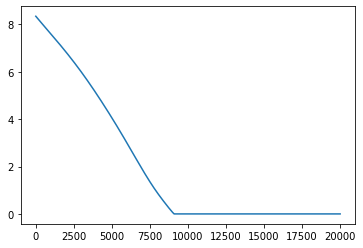

In [91]:
plt.plot(loss_plt)
loss_plt[-1]


In [92]:
L2Loss(net(inputs), targets)

tensor(9.6942e-05, grad_fn=<LinalgVectorNormBackward0>)

In [93]:
print(params)

[Parameter containing:
tensor([[-0.0680, -0.1324, -0.1327,  ..., -0.0485,  0.0518, -0.0054],
        [-0.1118, -0.0112,  0.0051,  ...,  0.1051,  0.0854, -0.0253],
        [-0.1108, -0.0779,  0.0694,  ..., -0.0404,  0.0112, -0.0727],
        ...,
        [ 0.0301, -0.0818,  0.0178,  ..., -0.1211, -0.1065, -0.1284],
        [-0.0853, -0.0983,  0.0156,  ...,  0.1011,  0.0409,  0.1333],
        [-0.0511, -0.1050, -0.0183,  ..., -0.0002, -0.1150,  0.0216]],
       requires_grad=True), Parameter containing:
tensor([[-0.0199,  0.0208,  0.1530,  ...,  0.0572, -0.0816, -0.0162],
        [ 0.1196,  0.1630, -0.1398,  ..., -0.0417,  0.1510,  0.1162],
        [-0.1083,  0.1377,  0.0623,  ...,  0.0912, -0.0358,  0.1350],
        ...,
        [-0.1501, -0.0220,  0.1080,  ...,  0.0646,  0.0229,  0.0339],
        [-0.1418, -0.0806,  0.1196,  ..., -0.0015, -0.0150,  0.1415],
        [-0.1131,  0.1681,  0.0198,  ...,  0.0838,  0.1486,  0.0851]],
       requires_grad=True)]


In [94]:
W1 = params[0].requires_grad_(False)
W2 = params[1].requires_grad_(False)

In [95]:
input = inputs.resize(M, 1)
sum(abs(mm(mm(W2, W1), input) - input))

tensor([0.0006])

In [96]:
Y = input
grad_w1_true = 2*mm(mm(transpose(W2, 0, 1), mm(W2, W1)-torch.eye(M)), mm(Y, transpose(Y, 0, 1)))
grad_w2_true = 2*mm(mm(mm(W2, W1)-torch.eye(M), mm(Y, transpose(Y, 0, 1))), transpose(W1, 0, 1))

In [97]:
print(grad_w1_true)
print(grad_w2_true)

tensor([[ 6.4671e-05,  7.2002e-05,  2.6375e-05,  ...,  4.4525e-05,
          5.5730e-05,  6.8545e-05],
        [-1.0967e-05, -1.2159e-05, -4.2617e-06,  ..., -7.5102e-06,
         -9.2983e-06, -1.1563e-05],
        [-4.4048e-05, -4.9293e-05, -1.8030e-05,  ..., -3.0667e-05,
         -3.7789e-05, -4.6432e-05],
        ...,
        [ 1.9729e-05,  2.2292e-05,  8.1658e-06,  ...,  1.3828e-05,
          1.7047e-05,  2.1577e-05],
        [ 1.6570e-05,  1.8656e-05,  6.8843e-06,  ...,  1.1295e-05,
          1.4424e-05,  1.7822e-05],
        [ 6.0439e-05,  6.7323e-05,  2.4587e-05,  ...,  4.1842e-05,
          5.1945e-05,  6.4850e-05]])
tensor([[ 4.5910e-05, -8.2040e-05, -3.4909e-05,  ...,  1.1618e-04,
         -4.2174e-05, -3.1550e-05],
        [-3.7829e-05,  6.7463e-05,  2.8675e-05,  ..., -9.5760e-05,
          3.4684e-05,  2.6077e-05],
        [ 2.9364e-05, -5.1950e-05, -2.1995e-05,  ...,  7.4138e-05,
         -2.6865e-05, -2.0219e-05],
        ...,
        [ 2.8348e-05, -5.0047e-05, -2.0832e-05

In [98]:
mm(mm(Y, transpose(Y, 0, 1)), transpose(W1, 0, 1))

tensor([[-1.5797,  2.8030,  1.1856,  ..., -3.9830,  1.4456,  1.0864],
        [-1.7618,  3.1260,  1.3222,  ..., -4.4420,  1.6122,  1.2116],
        [-0.6441,  1.1429,  0.4834,  ..., -1.6241,  0.5895,  0.4430],
        ...,
        [-1.0882,  1.9309,  0.8167,  ..., -2.7437,  0.9958,  0.7483],
        [-1.3588,  2.4110,  1.0198,  ..., -3.4260,  1.2434,  0.9344],
        [-1.6838,  2.9878,  1.2638,  ..., -4.2456,  1.5409,  1.1580]])

In [99]:
if torch.linalg.matrix_rank(W2) == N:
    test_mat = mm(mm(W2, inv(mm(transpose(W2, 0, 1), W2))), transpose(W2, 0, 1)) - torch.eye(M)
    print(torch.linalg.matrix_rank(test_mat + torch.eye(M)))
    print(torch.linalg.matrix_rank(test_mat))

tensor(40)
tensor(10)


In [100]:
mm(mm(inv(mm(transpose(W2, 0, 1), W2)), transpose(W2, 0, 1)) - W1, mm(Y, transpose(Y, 0, 1)))

tensor([[-2.0742e-05, -2.2888e-05, -8.4043e-06,  ..., -1.4424e-05,
         -1.7643e-05, -2.1696e-05],
        [ 5.8413e-06,  6.7949e-06,  2.4736e-06,  ...,  3.4571e-06,
          5.4836e-06,  5.7220e-06],
        [ 1.9193e-05,  2.0266e-05,  7.9274e-06,  ...,  1.3471e-05,
          1.7405e-05,  2.0027e-05],
        ...,
        [-2.8610e-05, -3.1710e-05, -1.1623e-05,  ..., -1.9193e-05,
         -2.4438e-05, -3.0279e-05],
        [-1.1772e-05, -1.3977e-05, -4.9919e-06,  ..., -8.6427e-06,
         -1.1161e-05, -1.3098e-05],
        [-5.3495e-05, -6.0141e-05, -2.1830e-05,  ..., -3.6955e-05,
         -4.6104e-05, -5.7518e-05]])

In [101]:
mm(Y, transpose(Y, 0, 1))

tensor([[2.8248, 3.1503, 1.1518,  ..., 1.9459, 2.4297, 3.0110],
        [3.1503, 3.5134, 1.2846,  ..., 2.1701, 2.7097, 3.3580],
        [1.1518, 1.2846, 0.4697,  ..., 0.7934, 0.9907, 1.2278],
        ...,
        [1.9459, 2.1701, 0.7934,  ..., 1.3404, 1.6737, 2.0741],
        [2.4297, 2.7097, 0.9907,  ..., 1.6737, 2.0899, 2.5899],
        [3.0110, 3.3580, 1.2278,  ..., 2.0741, 2.5899, 3.2095]])

In [102]:
print(torch.linalg.matrix_rank(mm(W2, W1) - torch.eye(M)))
print(torch.linalg.matrix_rank(mm(mm(W2, W1) - torch.eye(M), mm(Y, transpose(Y, 0, 1)))))

tensor(49)
tensor(48)
